## Diffusion Process

##### Problem 1. Solution for a diffusion problem 
Write a Python program to demonstrate solution for a diffusion process from a continuous release (Hint: plot C/C0 as a function of x at different t). Take the following parameters:

* 	Distance x is from 0 to 1 m.
* 	Time t is from 0 to 600 seconds.
* 	Diffusion coefficient D = 1×10-4 m2/s.

###### To solve this problem we can use the equation 2.37 in the textbook. Alternatively we can use the fundamental solution for diffusion equation 2.14 and slove it considering the initial conditions and the fact that we have a continuous release of a constant contaminat flow. For this homework we jump to the equation 2.37 and skip to show how to develope this relationship mathematically. 

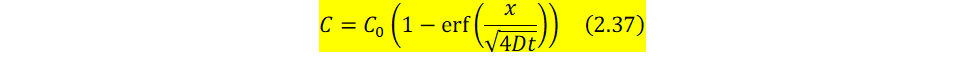

###### In which erf is the error function. In pyhton an easy way to get the error function is from scipy module. The codeblock below, imports error function from scipy, also we want to import numpy module for other math operations.  

In [1]:
########################################################
###      Importing required modules                  ###
########################################################
print("Importing required modules...")
import numpy as np
print("numpy imported")
import plotly.graph_objects as go
print("plotly imported")
import scipy
print("scipy imported")
from scipy import special
import matplotlib.pyplot as plt
print("matplotlib imported")
print("ready to go ...")

Importing required modules...
numpy imported
plotly imported
scipy imported
matplotlib imported
ready to go ...


In [ ]:
########################################################
###      Introducint plotting paramters              ###
########################################################
t=600                                 # the time in second from initial release
x = np.linspace(0, 1,1000)            # x domain from 0 to 1m with mm resolution
D=1.0e-4                              # diffusivity in m2/sec
D2 = 0.5e-4                           # second diffusivity for comparison
C0=1.0                                # the concentration for maintaned released.     


########################################################
###      Diffusion Equation 2.37 of textbook         ###
########################################################
z = (x/np.sqrt(4*D*t))               # the ratio x/sqrt(4Dt)
erfz = scipy.special.erf(z)          # error function 
C = C0*(1.0-erfz)                    # Equation 2.37 (Diffusion Equation for maintained release)


########################################################
###      Solving for D = 0.5e-4                      ###
########################################################
z = (x/np.sqrt(4*D2*t))               # the ratio x/sqrt(4Dt)
erfz = scipy.special.erf(z)          # error function 
C_05 = C0*(1.0-erfz)                    # Equation 2.37 (Diffusion Equation for maintained release)

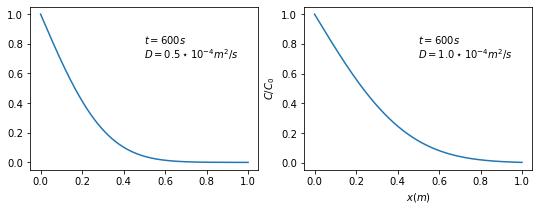

In [5]:
########################################################
###      Plotting C/C0 vs x for t=600 sec            ###
########################################################
fig,ax = plt.subplots(1,2, figsize=(9,3))
plt.xlabel('$x (m) $')
plt.ylabel('$C/C_0$')
ax[0].plot(x, C_05)
ax[0].text(0.5, 0.8, '$t =  600 s $')
ax[0].text(0.5, 0.7, '$ D =0.5 \star 10^{-4} m^2/s $')
ax[1].plot(x, C)
ax[1].text(0.5, 0.8, '$t =  600 s $')
ax[1].text(0.5, 0.7, '$ D =1.0 \star 10^{-4} m^2/s $')
plt.show()

### Explaination
###### Smaller values of diffusivity means slower diffusion over time. Thus as can be seen in above plots, figure on the left has a diffusion coefficient of about $D=5\times10^{-5} m^2/s$ is much less distributed in x direction and sharper gradeint of salute concentration in x direction. In comparison to the figure on the right which has a $D = 1\times10^{-4} m^2/s$ and the gradient of salute concentration has less slope. 

### Creating an HTML Intractive Plot with Ploty
###### This module creates a HTML intractive plot of diffusion process from t=0 to t=600 sec. The plot will be saved in the same directory as the notebook. This code block will ask you to enter the coefficient of diffusivity D and concentration C0.

In [5]:
########################################################
###      Plotting for each time step using Plotly    ###
########################################################
C0 = input("Enter the concentration introduced to the system continuously = ")
D = input("Enter the cofficent of diffusivity (m2/s) = ")

# Create a figure for showing the plot
fig = go.Figure(layout = dict(plot_bgcolor= "darkgrey"))

# Add traces, one for each time step
for time in np.arange(1, 600, 5):
    x=np.arange(0, 1, 0.01)
    z = x/np.sqrt(4*float(D)*time)
    erfz = scipy.special.erf(z)
    fig.add_trace(
        go.Scatter(
            visible=False,
            line=dict(color="blue", width=2),
            x=x,
            y= int(C0)*(1.0-erfz)))


# Create and add slider
timesteps = []
for i in range(len(fig.data)):
    step = dict(
        method="update",
        args=[{"visible": [False] *len(fig.data)},
              {"title": "Diffusion process for a continuous point source at " + (str(5*i)) + " seconds"}],  # layout attribute
    )
    step["args"][0]["visible"][i] = True  # Toggle i'th trace to "visible"
    timesteps.append(step)

sliders = [dict(
    active=0,
    currentvalue={"prefix": "Time: "},
    pad={"t": 10},
    steps=timesteps
)]

fig.update_layout(
    sliders=sliders
)
print("plotting completed...")
print("Interactive HTML file showing the changes in concentration over time is created in the folder containing this code")
fig.write_html("diffusion%s.html" %str(D))
fig.show()

Enter the concentration introduced to the system continuously = 1
Enter the cofficent of diffusivity (m2/s) = 1e-4
plotting completed...
Interactive HTML file showing the changes in concentration over time is created in the folder containing this code
